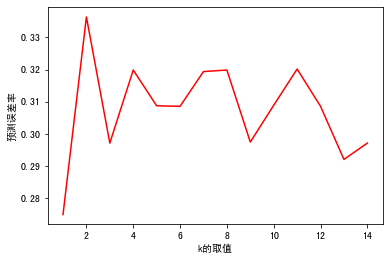

模型预测准确率： 0.7666666666666667
测试集的预测标签： [0 1 1 0 1 1 0 2 1 1 0 1 0 2 2 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2]
测试集的真实标签： [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2]


In [3]:
#项目4-项目考核代码

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import cross_val_score  #导入交叉验证模块
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#将数据集拆分为训练集与测试集
x,y=load_wine().data,load_wine().target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=30) 

#k取不同值的情况下，模型的预测误差率计算
k_range=range(1,15)         #设置k值的取值范围
k_error=[]                  #保存预测误差率的数组
for k in k_range:
    model=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(model,x,y,cv=5,scoring='accuracy')#5折交叉验证
    k_error.append(1-scores.mean())              

#画图，x轴表示k的取值，y轴表示预测误差率
plt.rcParams['font.sans-serif']='Simhei'
plt.plot(k_range,k_error,'r-')
plt.xlabel('k的取值')
plt.ylabel('预测误差率')
plt.show()

#k=1时，训练模型
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
#对模型进行评估
pred=model.predict(x_test)
ac=accuracy_score(y_test,pred)
print("模型预测准确率：",ac)
print("测试集的预测标签：",pred)
print("测试集的真实标签：",y_test)